# Homework 3: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

In [2]:
MY_UNIQNAME = 'yuqin'

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

CA = pd.read_csv("data/youtube-new/CAvideos.csv")
US = pd.read_csv("data/youtube-new/USvideos.csv")
GB = pd.read_csv("data/youtube-new/GBvideos.csv")
DE = pd.read_csv("data/youtube-new/DEvideos.csv")
FR = pd.read_csv("data/youtube-new/FRvideos.csv")

### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

Plot histograms for these metrics for the US. What can you say about them?

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


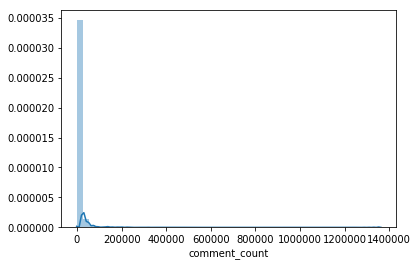

In [11]:
sns.distplot(US['comment_count'])

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


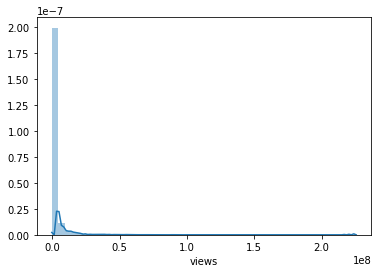

In [7]:
sns.distplot(US.views)

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


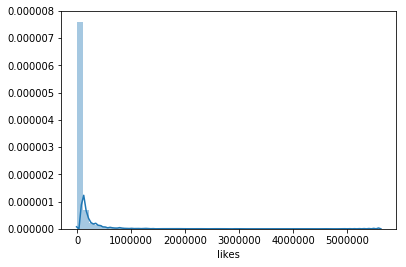

In [8]:
sns.distplot(US.likes)

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


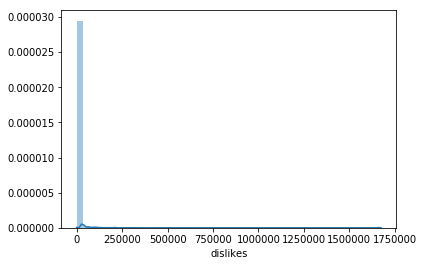

In [13]:
sns.distplot(US.dislikes)

### Explain:
Those plots tel us that the distributions of comments, views, likes, and dislikes for US are not normal distribution and seems to be centered around the left side of the diagram, which could be a good sign to do the transformation.

Try to apply a log transformation, and plot the histograms again. How do they look now?

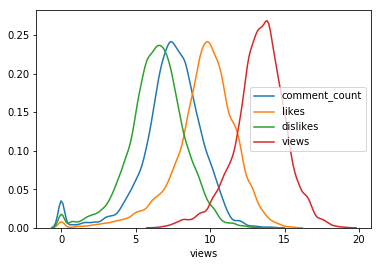

In [226]:
#blue
data = US['comment_count'].apply(np.log1p)
sns.distplot(data, hist=False, kde=True, label='comment_count')

#orange
data1 = US['likes'].apply(np.log1p)
sns.distplot(data1, hist=False, kde=True, label='likes')

# green
data2 = US['dislikes'].apply(np.log1p)
sns.distplot(data2, hist=False, kde=True, label='dislikes')

# red
data2 = US['views'].apply(np.log1p)
sns.distplot(data2, hist=False, kde=True, label='views')

# US['likes'].apply(np.log1p).hist()
# US['dislikes'].apply(np.log1p).hist()
# US['views'].apply(np.log1p).hist()

### Explain:
Log transform seems a good solution for better interpretation. We can see the distributions of those four variables become clearer than previous plots. The means of those four variables are significantly different. It seems like that people more prefer to "like" and "dislike" rather than "comment" others' posts.

Create a pairplot for the US,as we did in this week's lab. Do you see anything interesting?

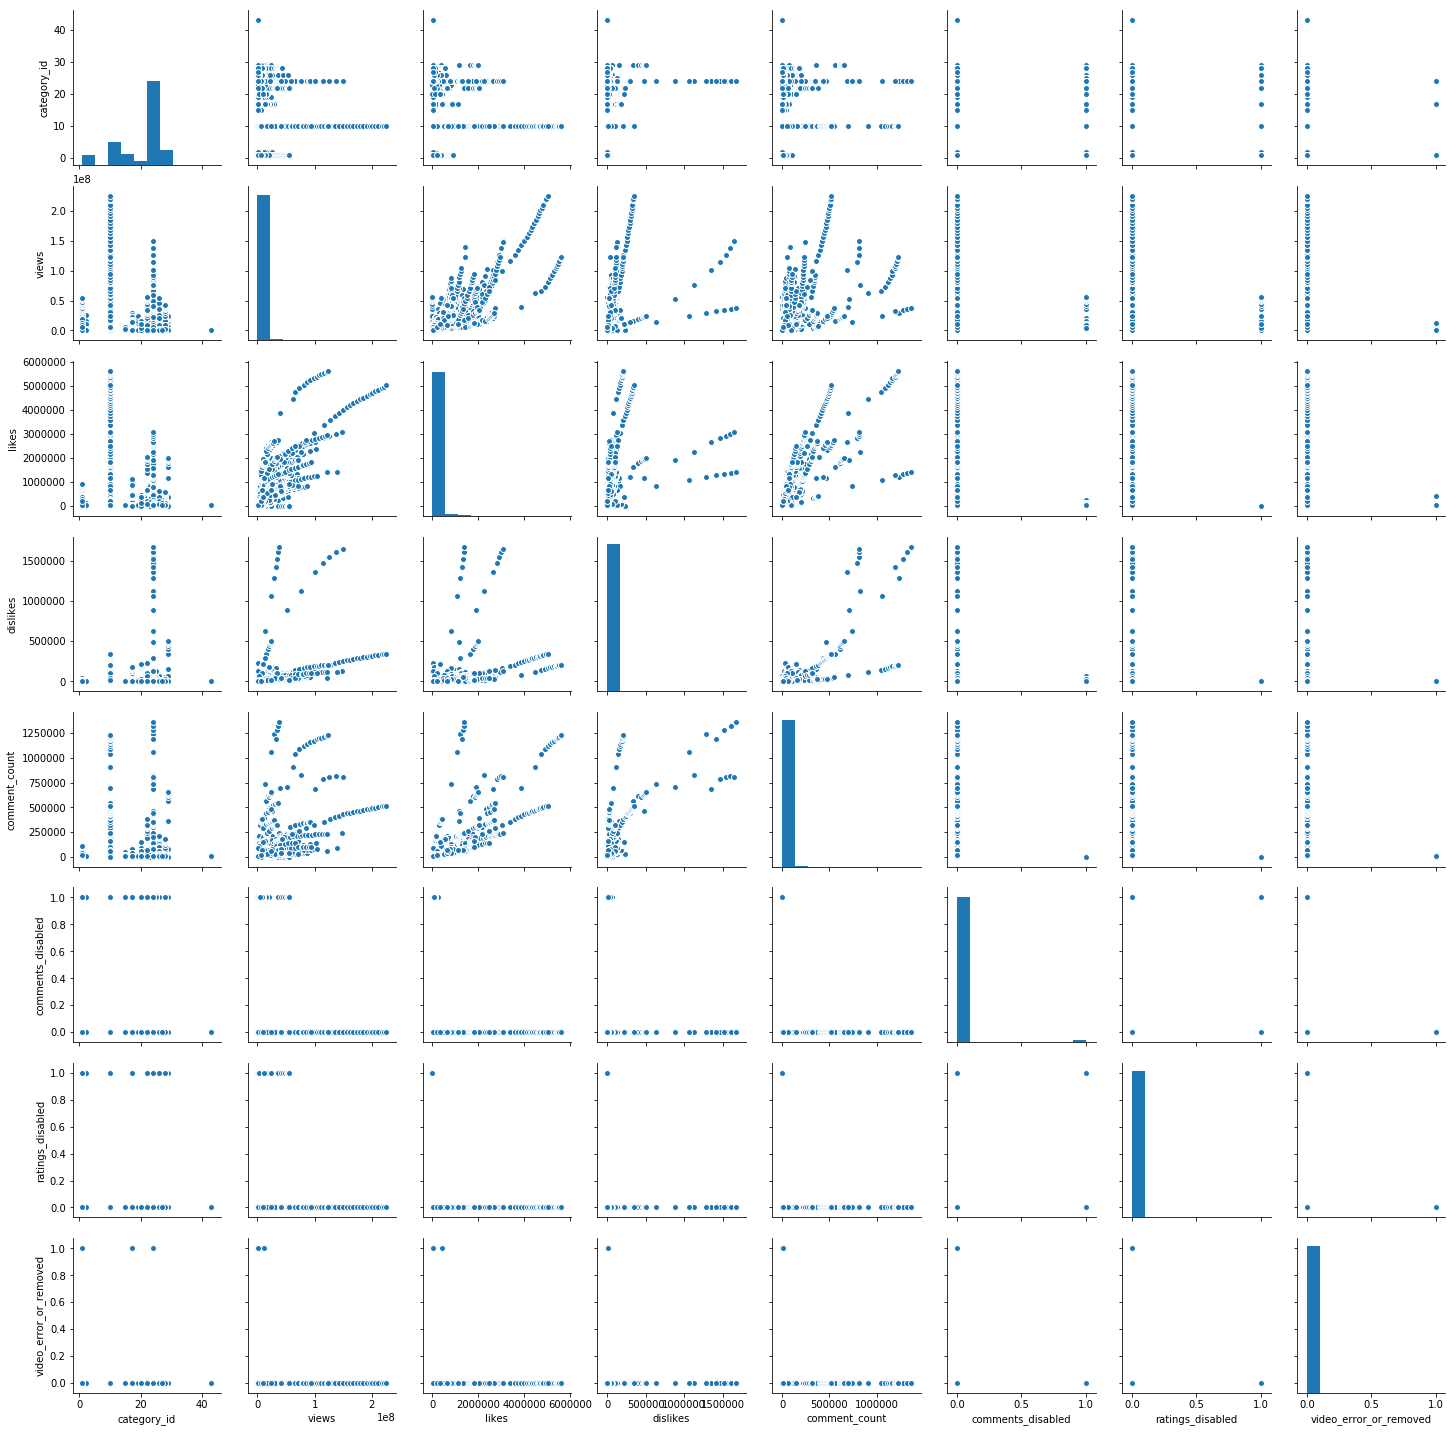

In [228]:
sns.pairplot(US)

### Explain:
In this plot, we can find there are potential correlations between comment_counts, views, likes, and dislikes.

Create additional pairplots for the other four regions. Do they look similar?

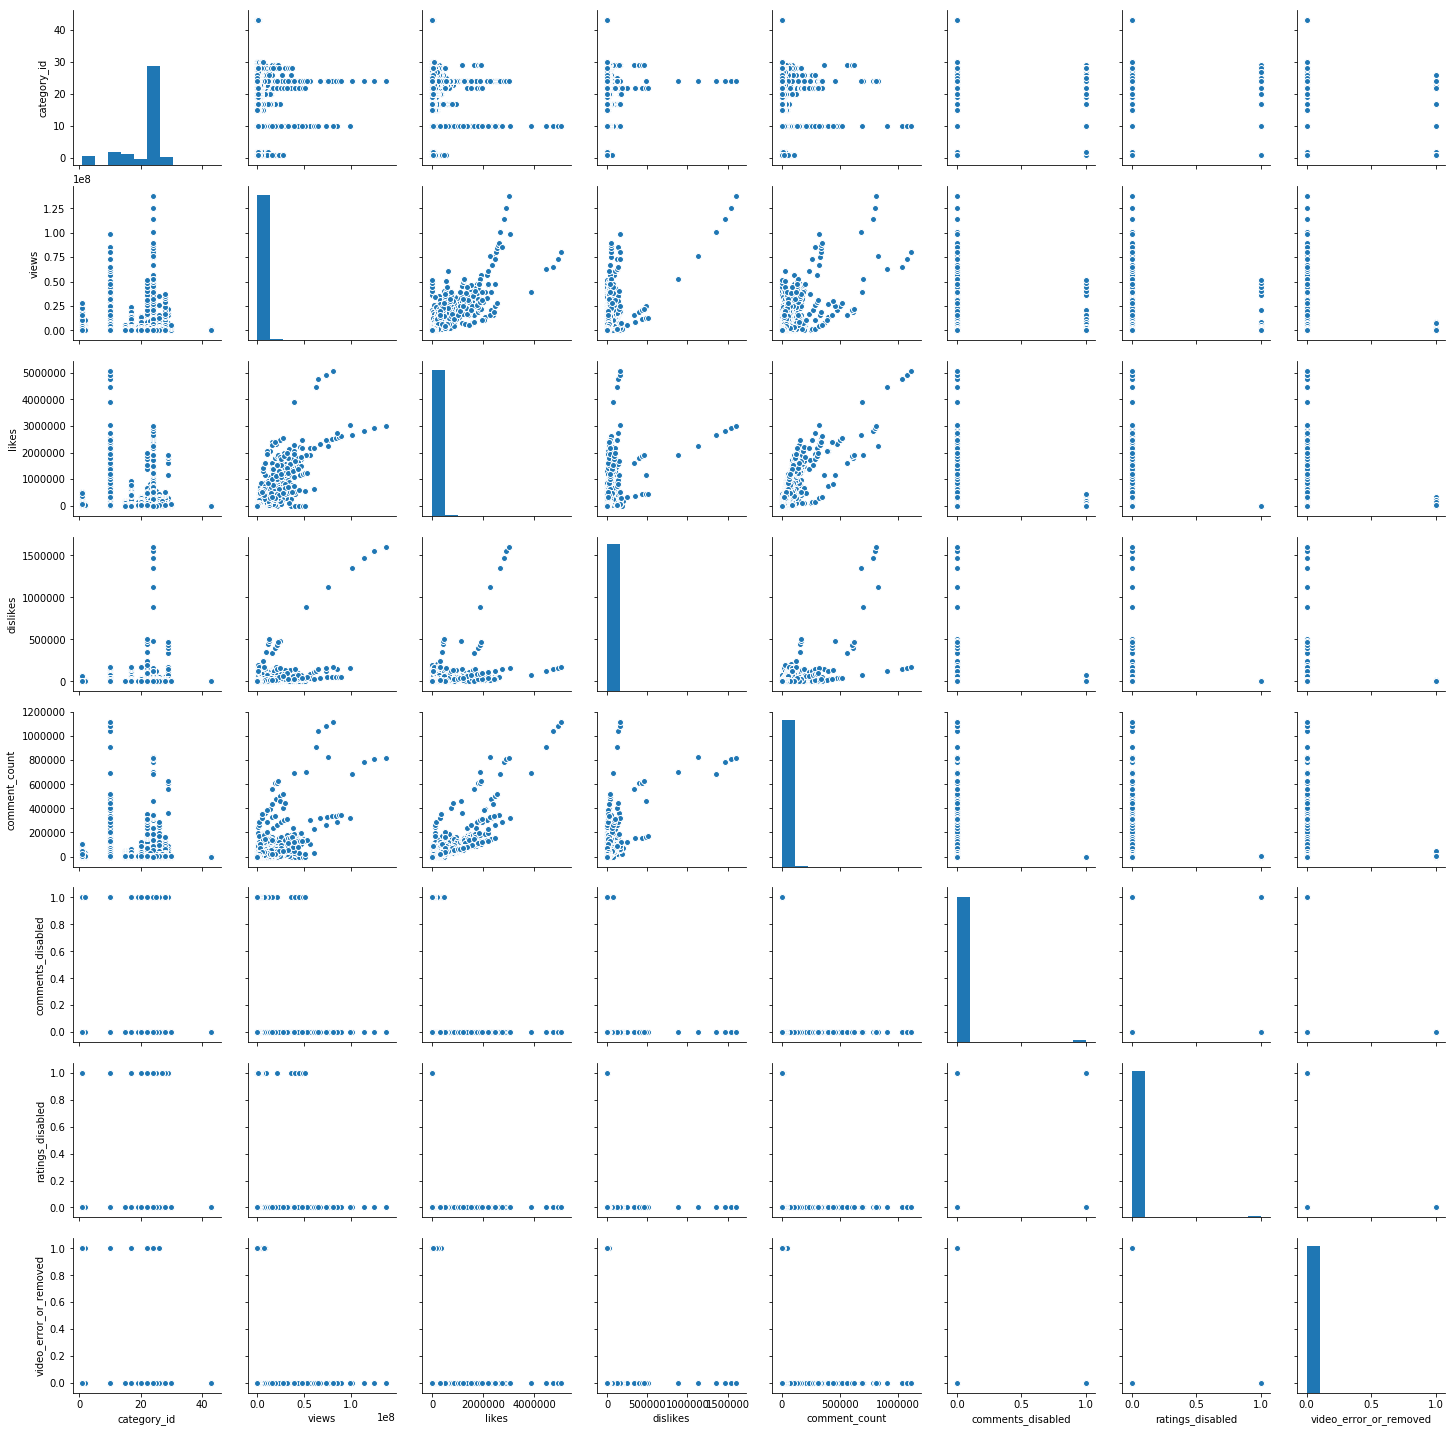

In [30]:
sns.pairplot(CA)

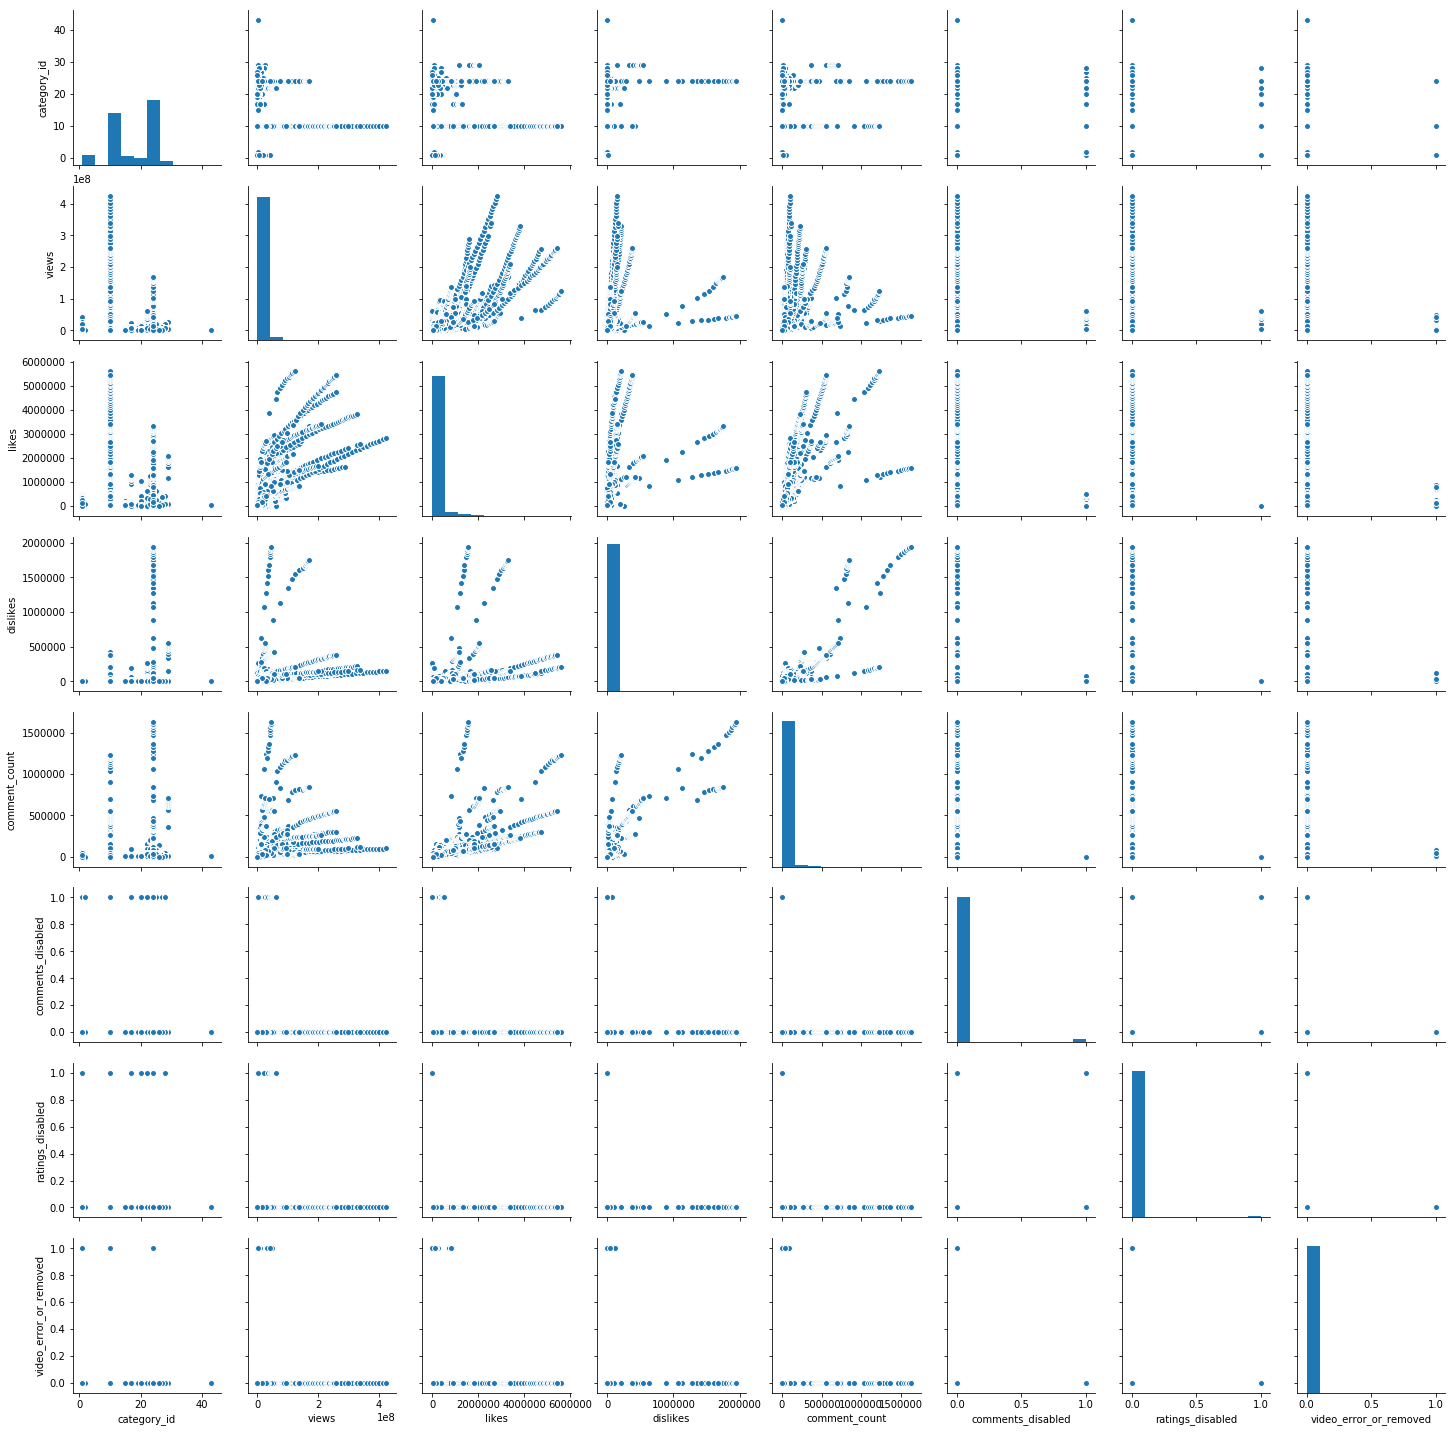

In [33]:
sns.pairplot(GB)

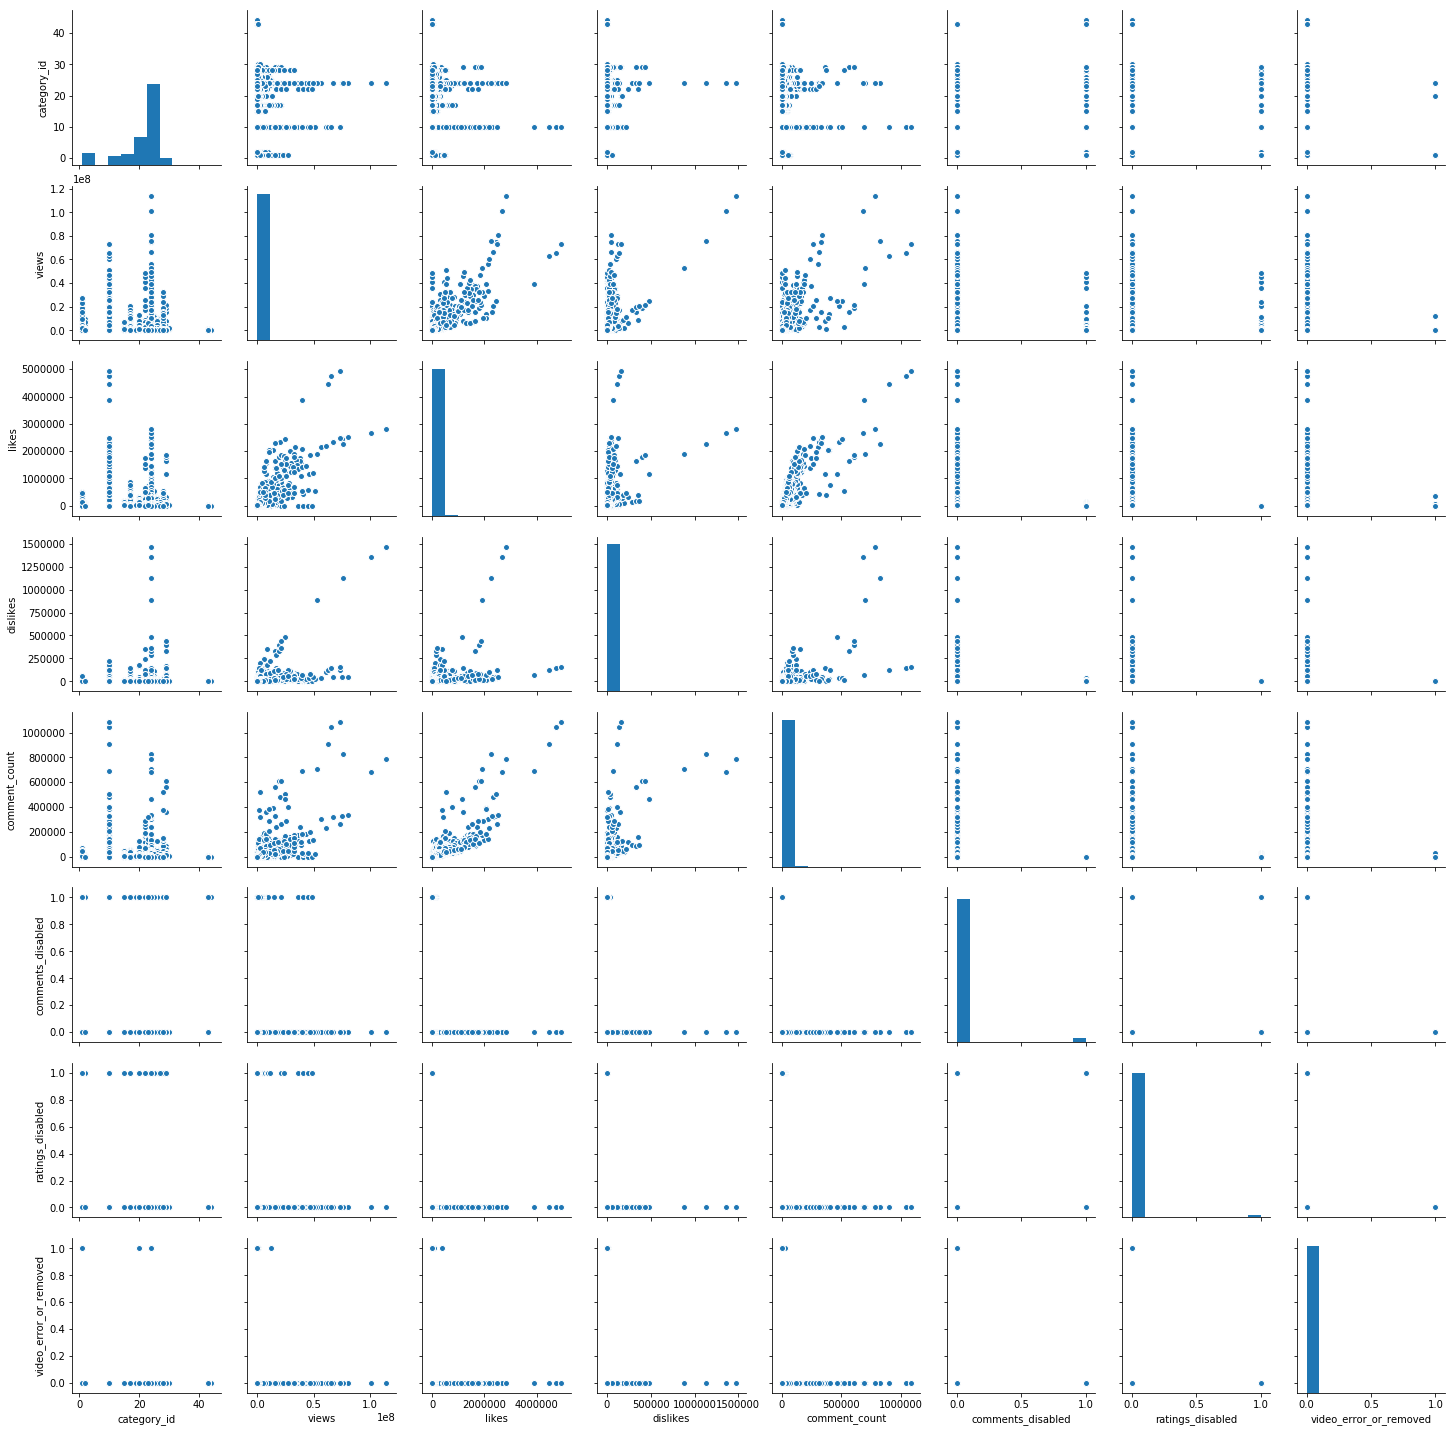

In [34]:
sns.pairplot(DE)

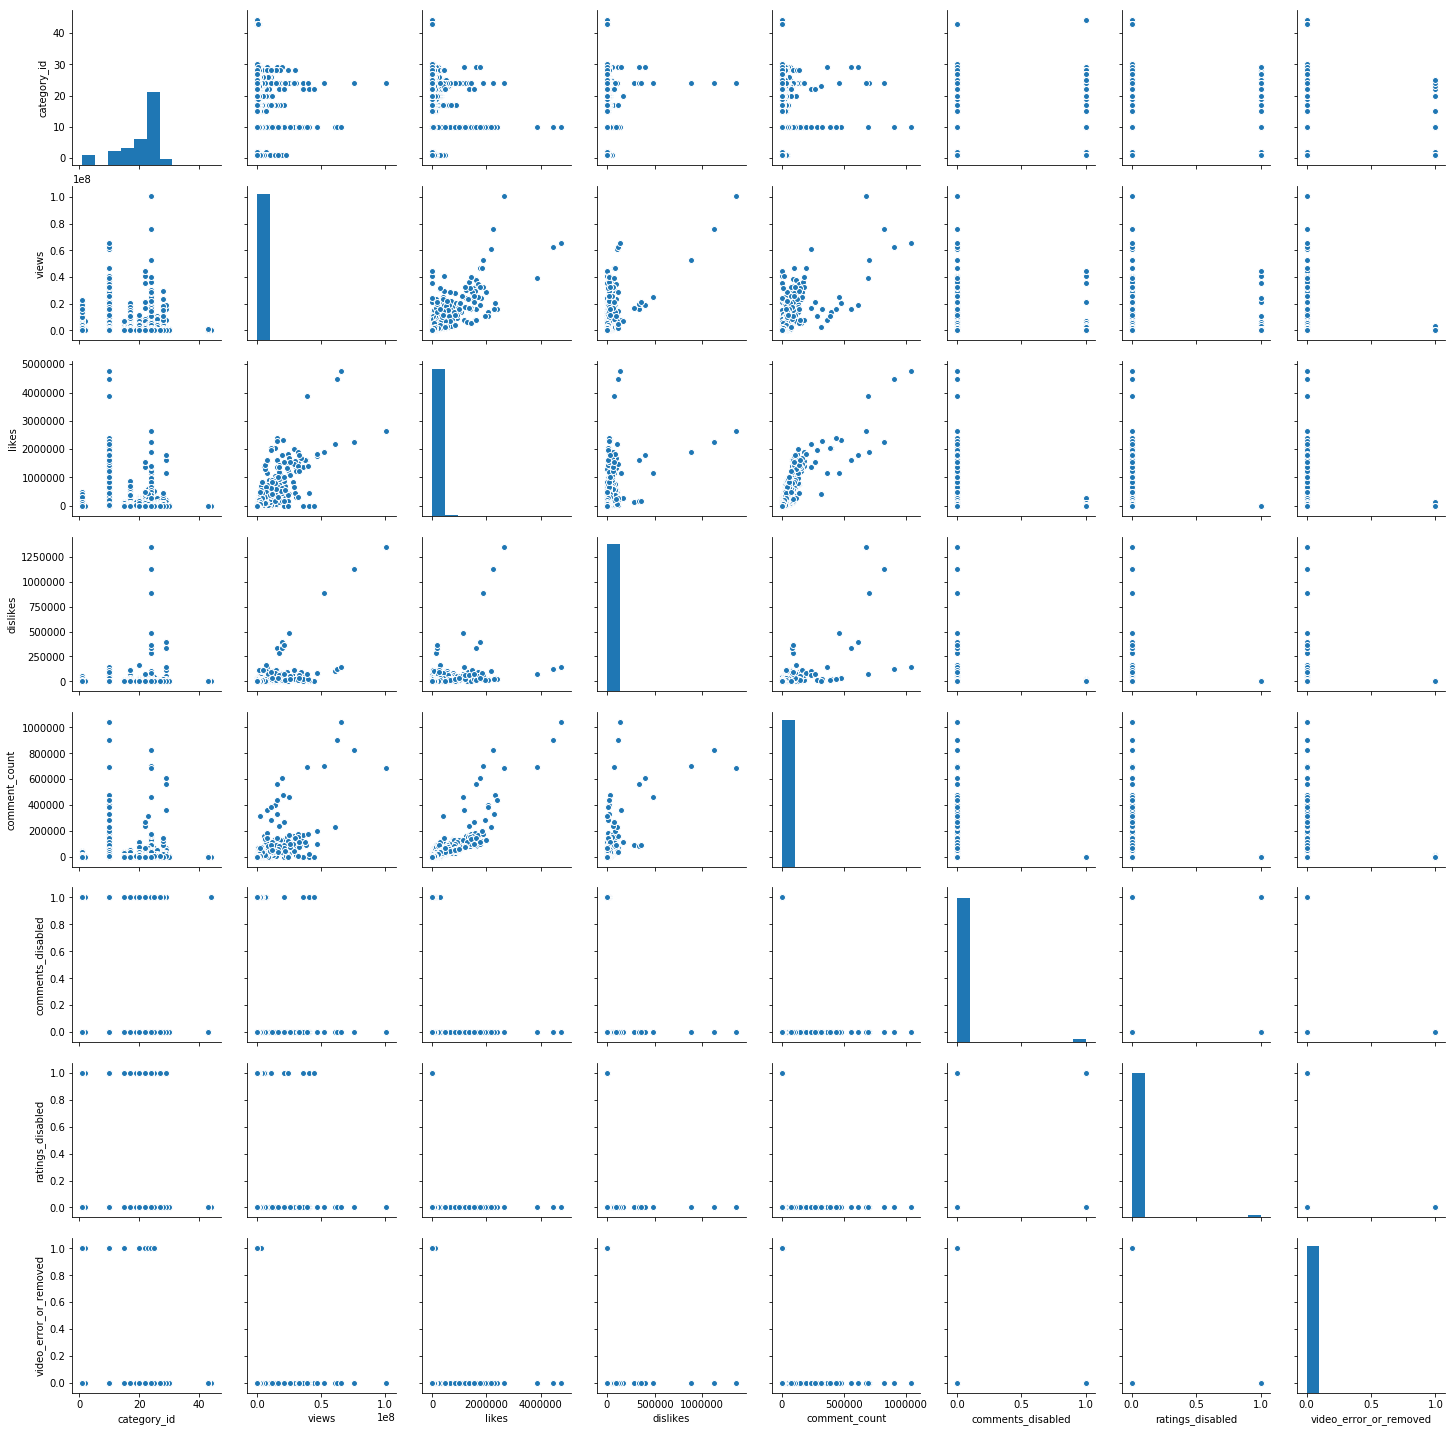

In [35]:
sns.pairplot(FR)

### Explain:
Across those plots for different regions, it seems to me that for all those regions, there are potential correlations between comment_counts, views, likes, and dislikes.

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

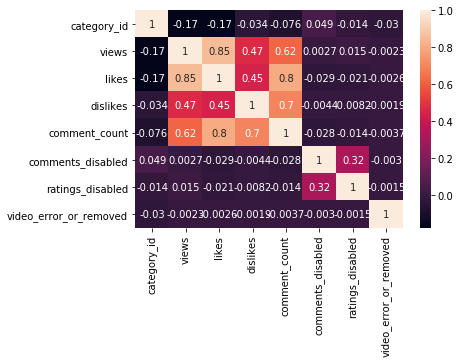

In [38]:
# put your code here
# A correlation matrix is a table showing correlation coefficients between variables. 
# Each cell in the table shows the correlation between two variables.
sns.heatmap(US.corr(),annot=True)

### Explain:
We can find some significant correlated variables in terms of their values of correlation coefficients, as follows:
* likes and comment_count: 0.8.
* likes and views: 0.85.
* dislikes and comment_count: 0.7.
* views and comment_count: 0.62. 

I also found one interesting thing that even though "likes" seem to be highly correlated with "views" while "dislikes" doesn't.

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [231]:
# put your code here
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Y dependent variable while x is independent variable
# ANOVA
model1 = smf.ols('views ~ C(category_id)', data=FR).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     72.35
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          3.53e-247
Time:                        16:21:37   Log-Likelihood:            -6.4310e+05
No. Observations:               40724   AIC:                         1.286e+06
Df Residuals:                   40706   BIC:                         1.286e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.258e+05   3.76e+04     11.325      0.000    3.52e+05       5e+05
C(category_id)[T.2]  -3.608e+05   7.71e+04     -4.679      0.000   -5.12e+05    -2.1e+05
C(category_id)[T.10]   8.48e+05   4.68e+04     18.134      0.000    7.56e+05     9.4e+05
C(category_id)[T.15]  -2.43e+05    1.2e+05     -2.033      0.042   -4.77e+05   -8733.016
C(category_id)[T.17]  3.405e+04    4.6e+04      0.740      0.459   -5.61e+04    1.24e+05
C(category_id)[T.19] -3.439e+05   1.64e+05     -2.091      0.037   -6.66e+05   -2.16e+04
C(category_id)[T.20] -1.193e+05   5.92e+04     -2.016      0.044   -2.35e+05   -3323.673
C(category_id)[T.22] -2.019e+05   4.41e+04     -4.575      0.000   -2.88e+05   -1.15e+05
C(category_id)[T.23]   1.08e+04    4.6e+04      0.235      0.814   -7.94e+04    1.01e+05
C(category_id)[T.24] -4.091e+04   4.15e+04     -0.985      0.325   -1.22e+05    4.05e+04
C(category_id)[T.25] -2.939e+05   4.72e+04     -6.228      0.000   -3.86e+05   -2.01e+05
C(category_id)[T.26] -2.275e+05    5.2e+04     -4.373      0.000   -3.29e+05   -1.26e+05
C(category_id)[T.27] -2.688e+05   7.33e+04     -3.665      0.000   -4.13e+05   -1.25e+05
C(category_id)[T.28]  1.502e+05   7.22e+04      2.080      0.038    8658.582    2.92e+05
C(category_id)[T.29]  9.601e+04   1.68e+05      0.572      0.567   -2.33e+05    4.25e+05
C(category_id)[T.30] -3.324e+05   5.28e+05     -0.630      0.529   -1.37e+06    7.02e+05
C(category_id)[T.43]  9.764e+04   1.79e+05      0.544      0.586   -2.54e+05    4.49e+05
C(category_id)[T.44] -4.194e+05   1.24e+06     -0.339      0.734   -2.84e+06       2e+06
==============================================================================
Omnibus:                    87847.752   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        682531355.282
Skew:                          19.201   Prob(JB):                         0.00
Kurtosis:                     636.059   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explain:
We can tell from the resluts that the F-statistic is 72.35 and the coefficients and the t value, which mean there are significant difference among the means of different groups, in this case, different categories of videos.

In [235]:
# Create two different regression models where the dependent variables are the same
# comment_count and likes
model2 = smf.ols('comment_count ~ likes', data=FR).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.057e+05
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:34:05   Log-Likelihood:            -4.2064e+05
No. Observations:               40724   AIC:                         8.413e+05
Df Residuals:                   40722   BIC:                         8.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -546.7673     37.421    -14.611      0.000    -620.113    -473.422
likes          0.1368      0.000    325.127      0.000       0.136       0.138
==============================================================================
Omnibus:                   103568.757   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4801265567.862
Skew:                          28.151   Prob(JB):                         0.00
Kurtosis:                    1684.183   Cond. No.                     9.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
# comment_count and dislikes
model3 = smf.ols('comment_count ~ dislikes', data=FR).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 3.227e+04
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:31:02   Log-Likelihood:            -4.3481e+05
No. Observations:               40724   AIC:                         8.696e+05
Df Residuals:                   40722   BIC:                         8.696e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1164.4957     52.112     22.346      0.000    1062.354    1266.637
dislikes       0.8196      0.005    179.631      0.000       0.811       0.829
==============================================================================
Omnibus:                   120241.269   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15888893858.075
Skew:                          41.777   Prob(JB):                         0.00
Kurtosis:                    3061.900   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Explain:
* We can tell from the result that there is a significant correlation between the number of comments and the number of likes. The equation is like comment_count = 0.1368*likes-546.7673.
* We can also find that there is a significant correlation between the number of comments and the number of dislikes. The equation is like comment_count = 0.8196*dislikes + 1164.4957.


## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [236]:
pokemon = pd.read_csv("data/Pokemon.csv")

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

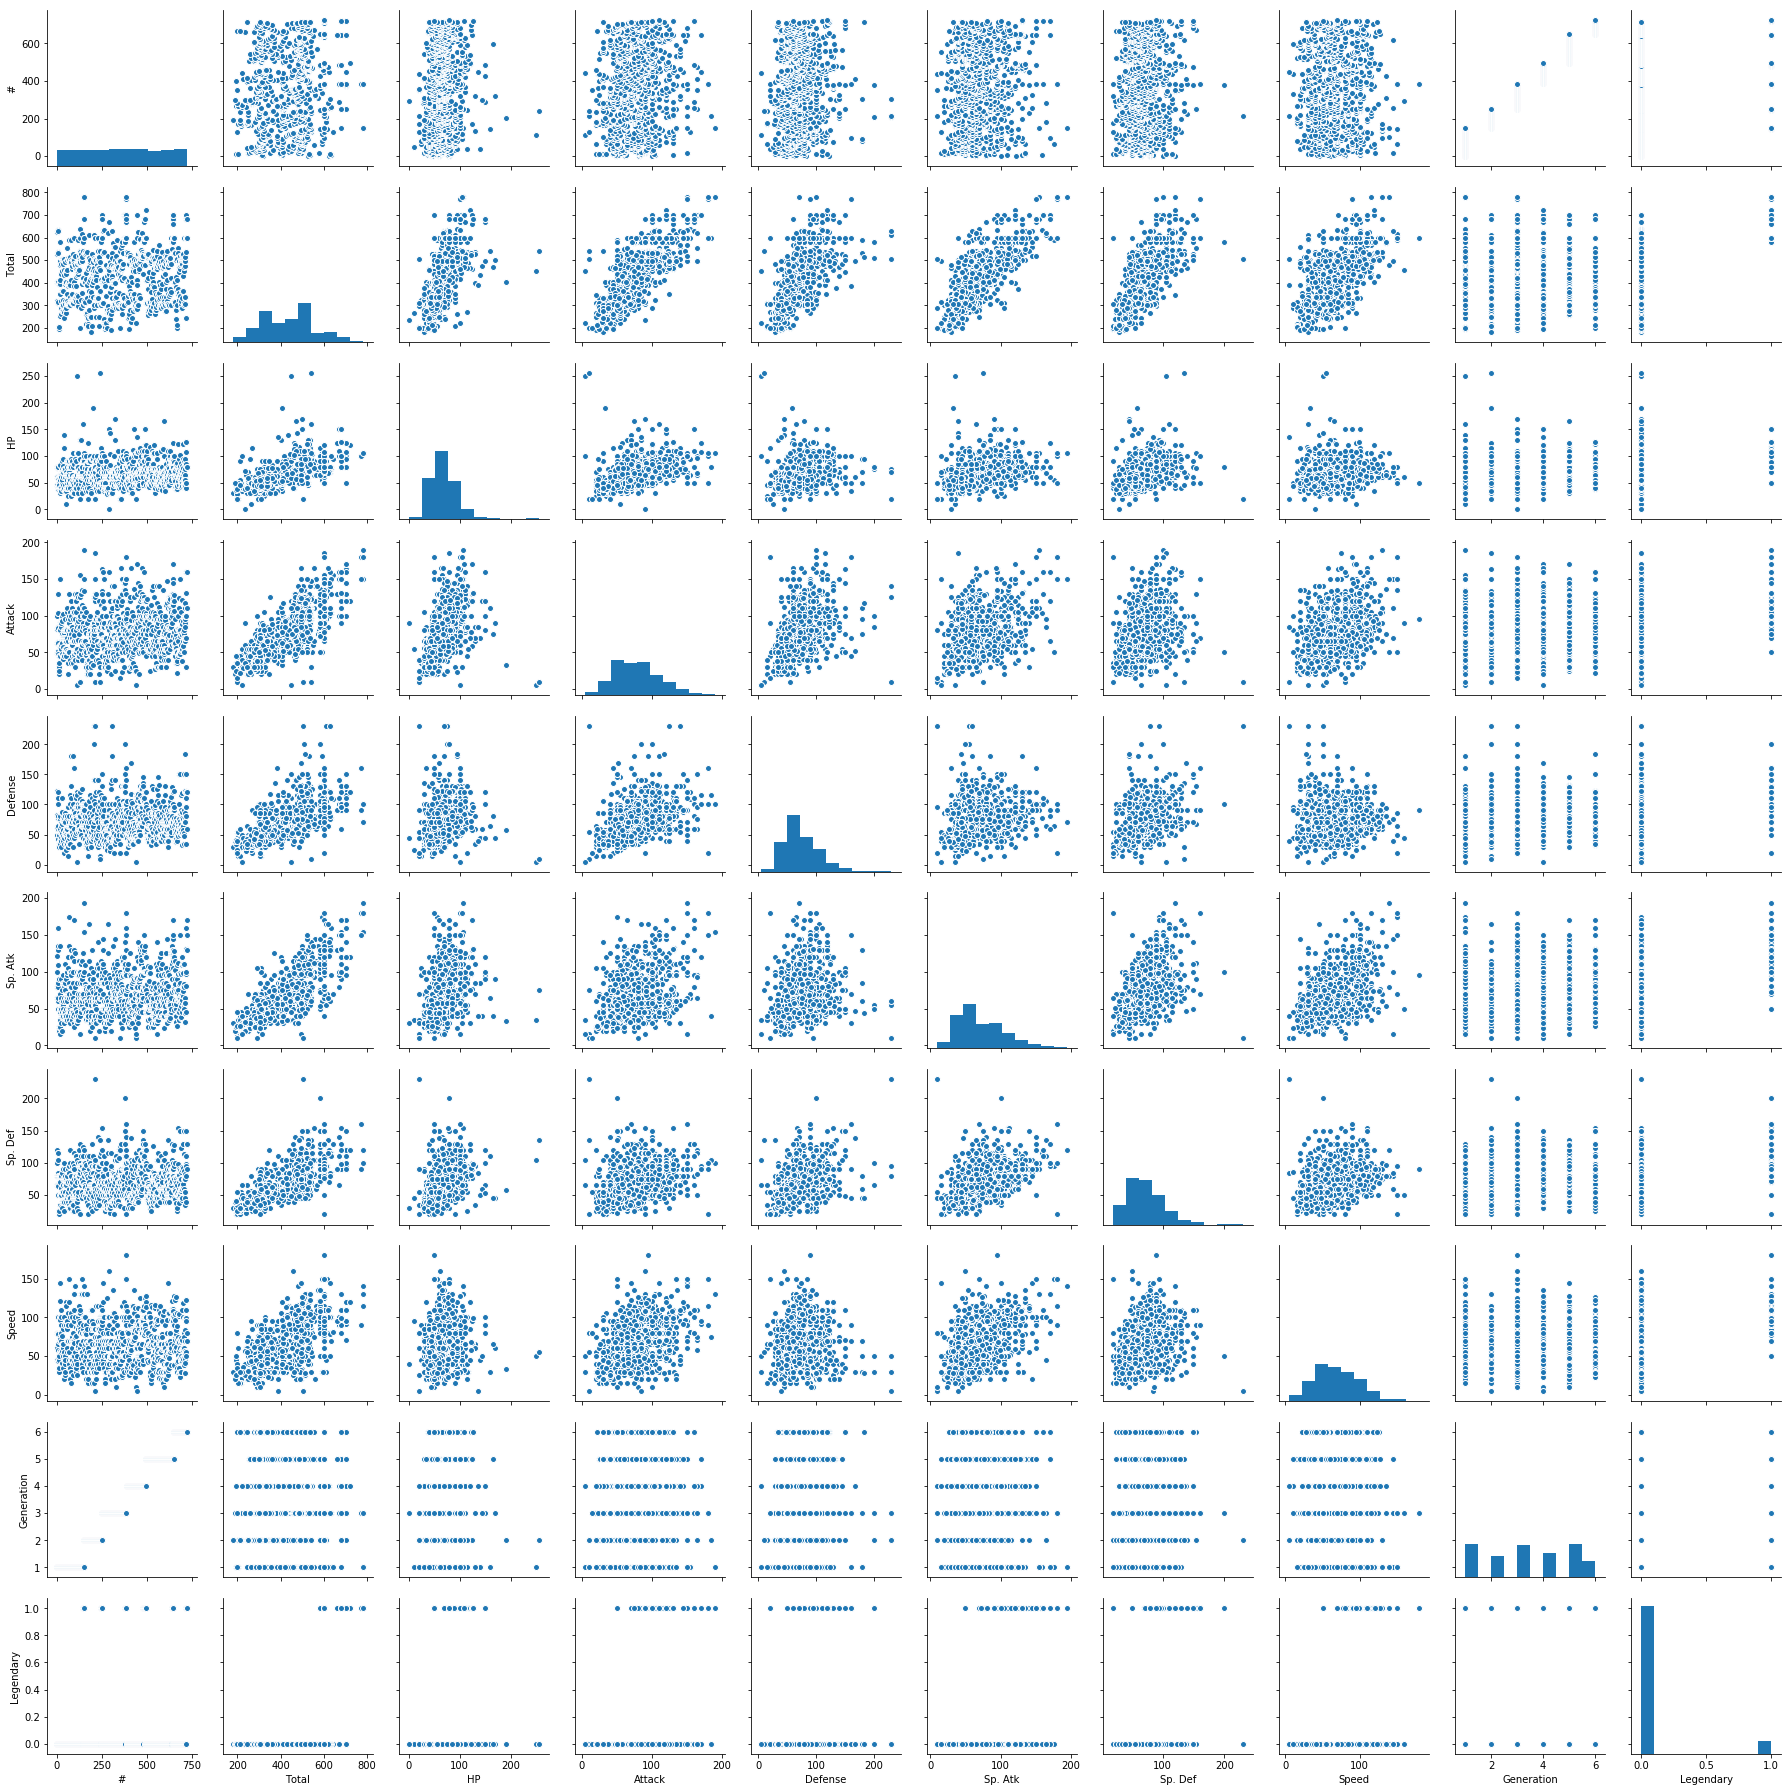

In [240]:
# put your code here
sns.pairplot(pokemon)

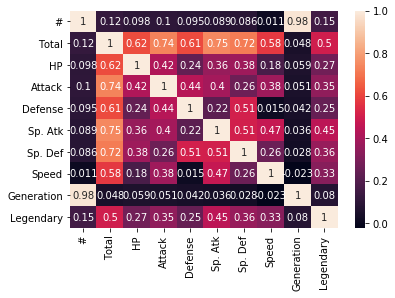

In [241]:
sns.heatmap(pokemon.corr(),annot=True)

### Explain:
* We can tell from the plot that the most correlated abilities are Sp.Atk and Total scores, which correlation coefficient is 0.75. It seems to me that the higher Sp.Stk score is, the better the total score will be.
* Among those abilities, the pair of Sp.Atk and Sp. Def and the pair of Defence and Sp. Def have the most correlation coefficients, which are both 0.51.
* Defence and speed have the least correlation coefficient, which is 0.015.


### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

In [118]:
# put your code here
# there is no correct answer but we need to find out the appropriate answer.
import matplotlib.pyplot as plt
from scipy import stats
one = pokemon['Type 1'].unique()
two = pokemon['Type 2'].unique()

From the results, we can confirm that the list of type of pokemon is 

In [98]:
print(one)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


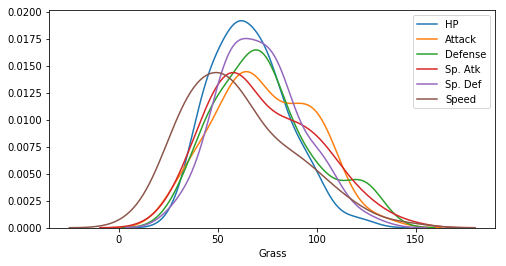

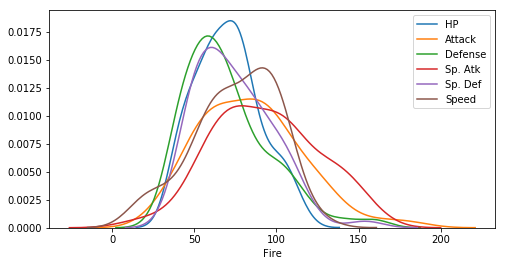

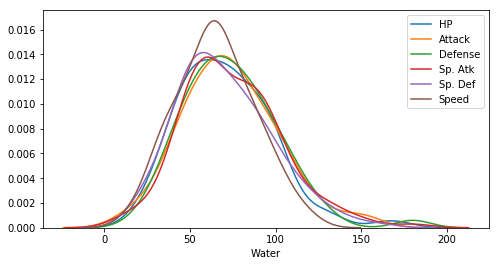

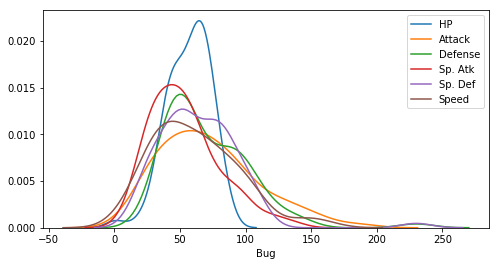

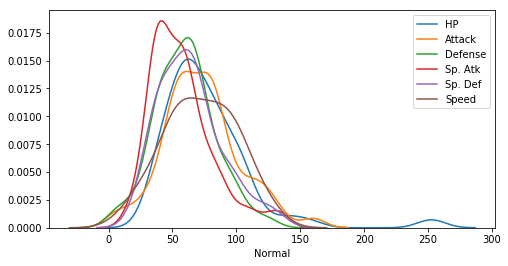

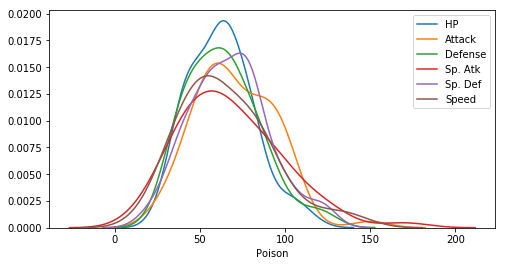

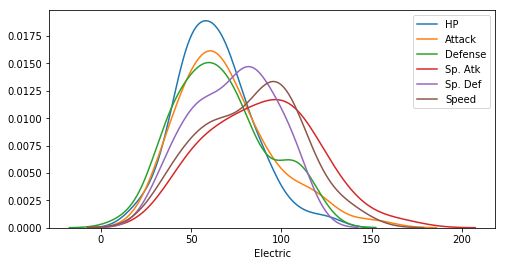

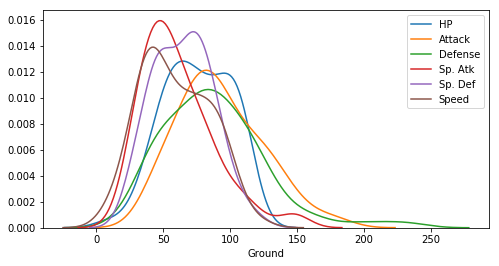

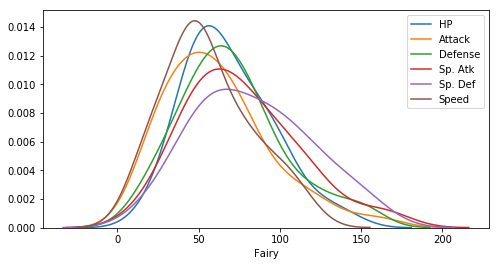

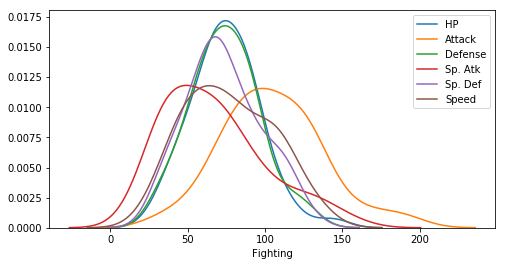

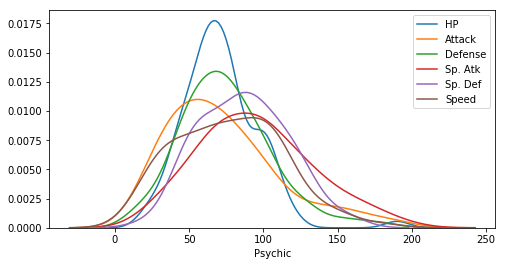

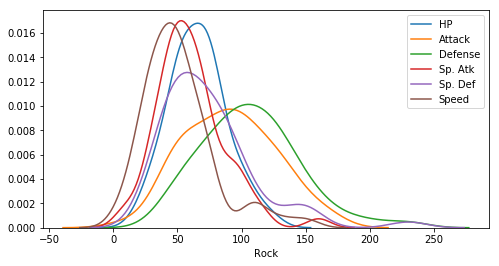

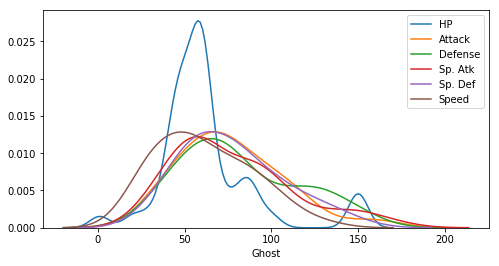

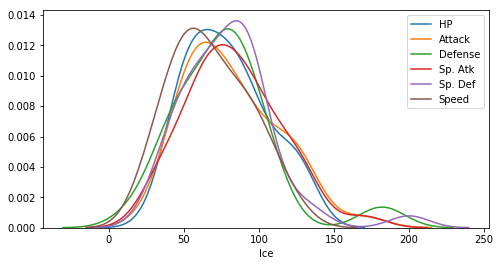

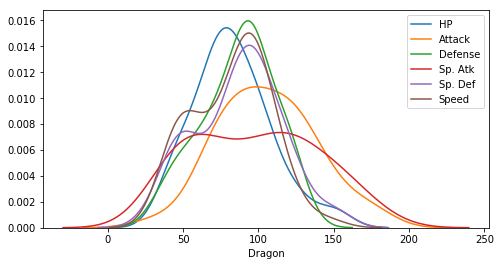

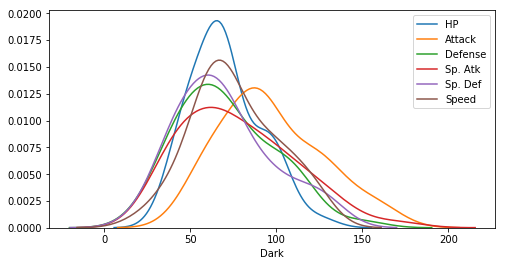

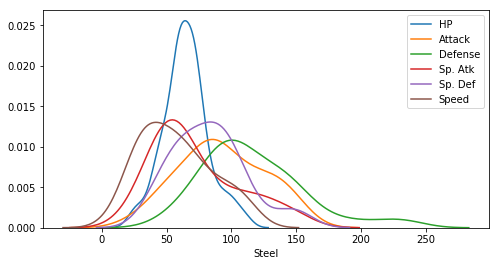

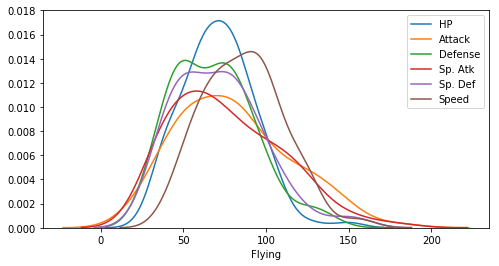

In [255]:
# For each type: how is the distribution of each ability points look like? 
# For each type: what's the best or worst ability for each type of pokemon?
def typePlots( pokemontype, data, ability):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,4)
    
    a = sns.distplot(data[ability[0]],hist=False, kde=True, label=ability[0])
    b = sns.distplot(data[ability[1]],hist=False, kde=True, label=ability[1])
    c = sns.distplot(data[ability[2]],hist=False, kde=True, label=ability[2])
    d = sns.distplot(data[ability[3]],hist=False, kde=True, label=ability[3])
    e = sns.distplot(data[ability[4]],hist=False, kde=True, label=ability[4])
    f = sns.distplot(data[ability[5]],axlabel= pokemontype, hist=False, kde=True, label=ability[5])
    
ability= ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for o in one:
    type = pokemon[(pokemon['Type 1'] == o)| (pokemon['Type 2'] == o)]
    typePlots(o, type, ability)

### Explain:
1. Normal Pokemon has similar scores among different abilities. which around 50.
2. The Grass, Water, Fairy and Poison Pokemons tend to get normal scores for different abilities. The mean scores of different abilities are similar
3. Fire Pokemon tends to have better speed among all its abilities, especially the speed and attack.
4. Bug Pokemon tends to have lower scores of all its abilities while relative good performance on HP ability.
5. Electric Pokemon has better performances on the abilities of Sp.Def, Speed and Sp. Atk.
6. Fighting Pokemon gets better scores on the ability of Attack.
7. Psychic Pokemon gets better scores on the ability of Sp. Def.
8. The Pock Pokemon has pretty good performance on the abilities of Defense and Attack.
9. Ghost Pokemon has unstable performances on the ability of HP; the score of its HP could be extremely high compared to other Pokemons, which around 150.
10. The overall scores of the abilities of the ice Pokemon and Dragon are generally higher than the Normal Pokemon.
11. The Flying Pokemon have better Speed scores.
12. The Steel Pokemon have good performances on Defense, Attack and Sp. Def but have bad performance on Speed.

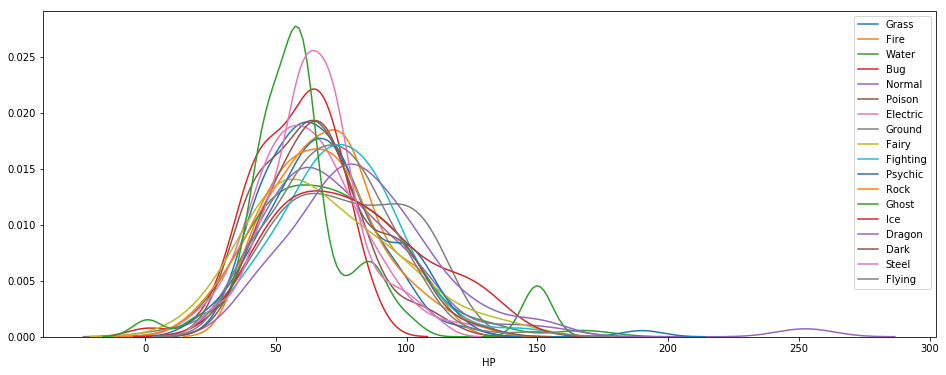

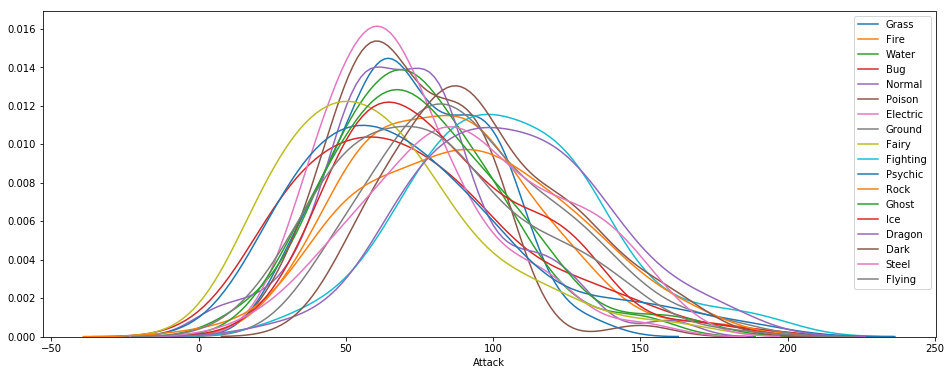

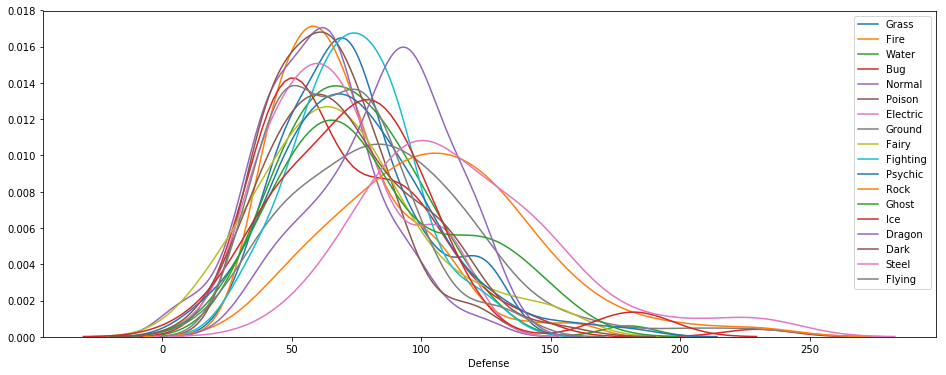

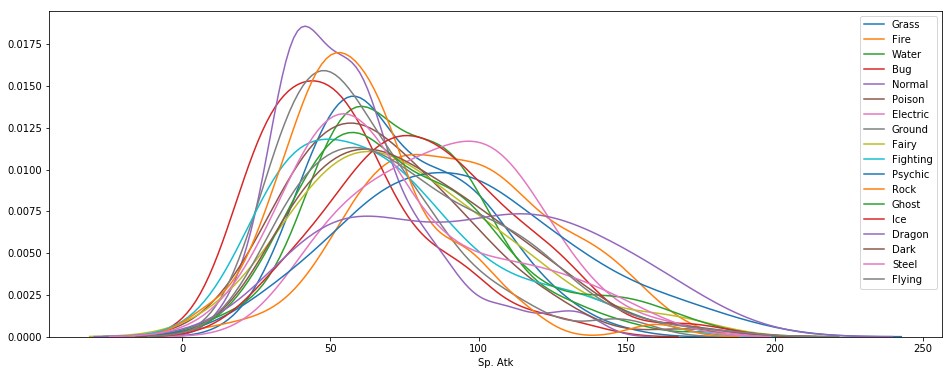

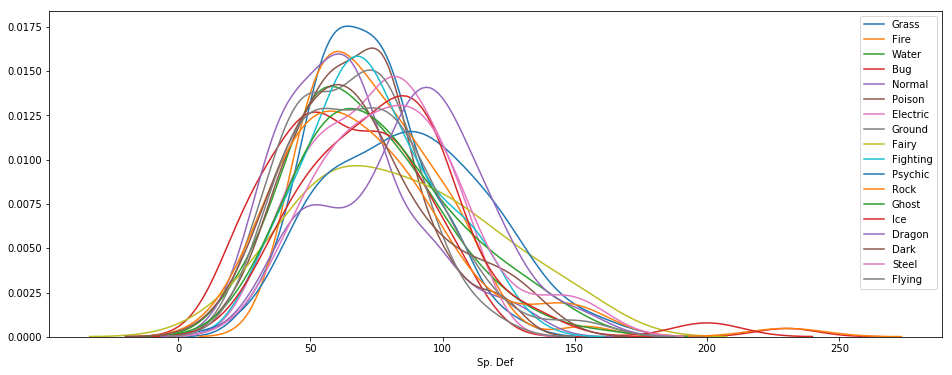

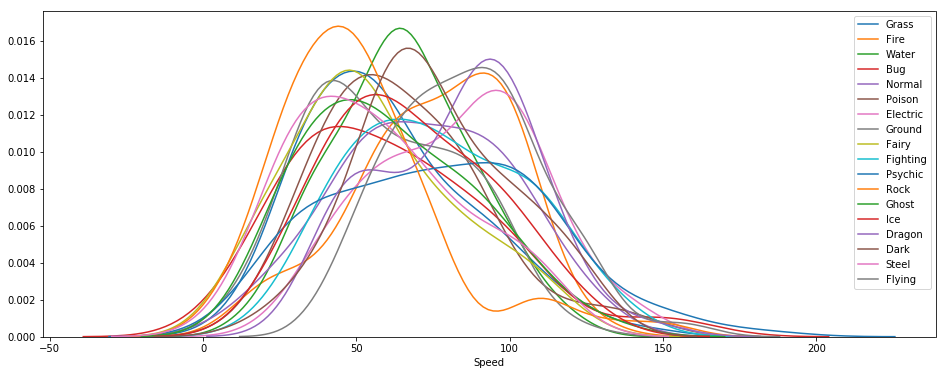

In [252]:
# Across different types, what's the best or worst ability for each type of pokemon?
# each ability which type is good or not?
def abilityPlots(ability):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,6)
    
    for o in one:
        type = pokemon[(pokemon['Type 1'] == o)| (pokemon['Type 2'] == o)]
        a = sns.distplot(type[ability],hist=False, kde=True, label=o)
    
ability= ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for a in ability:
    abilityPlots(a)


### Explain:
1. For the ability HP, the flying and some parts of Ghost have the good performances while some parts of Ghost has the bad performance.
2. For the ability Attack, Fighting Pokemon has the good performances while Fairy has the bad performance.
3. For the ability Defense, Rock Pokemon has the good performances while ice Pokemon the bad performance.
4. For the ability Speed, Electric Pokemon has the good performances while the bad performance.


### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [197]:
# generation list and ability list:
generation = [1,2,3,4,5,6]
ability= ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']

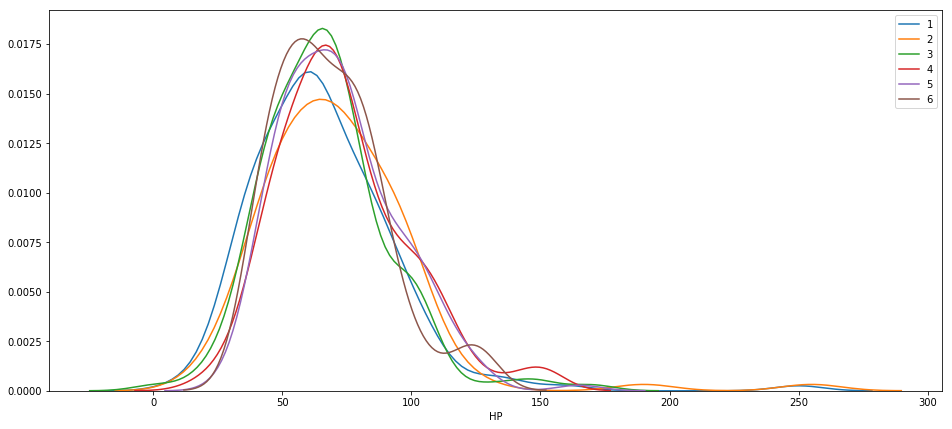

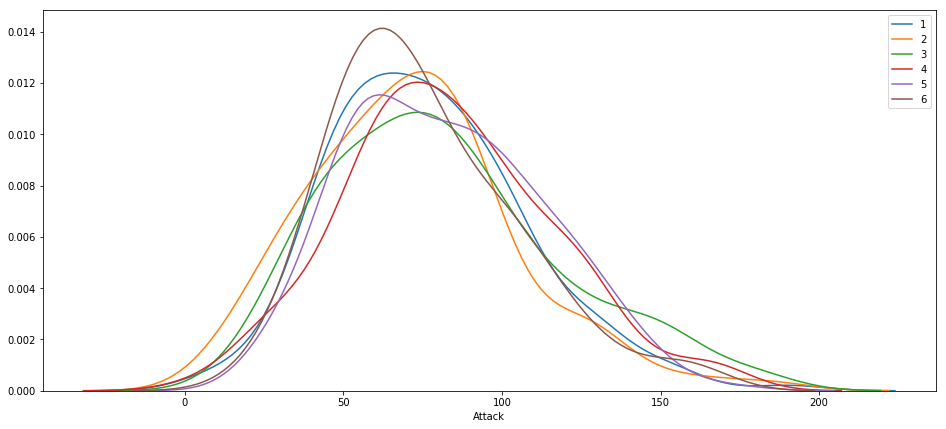

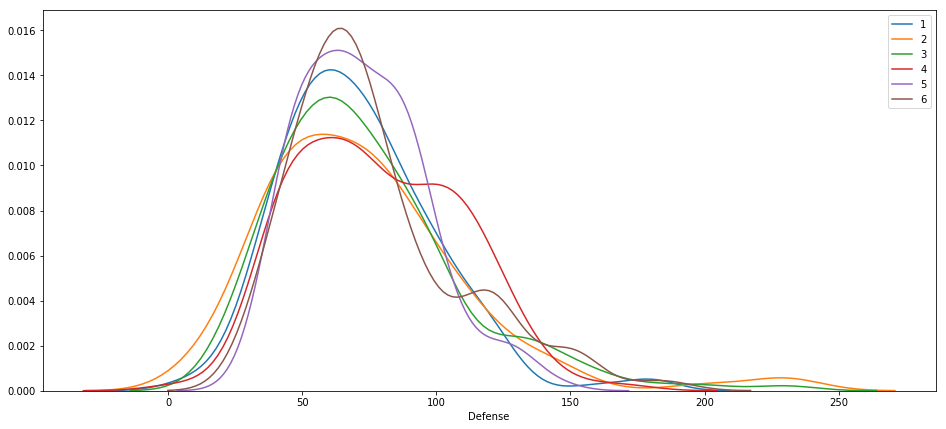

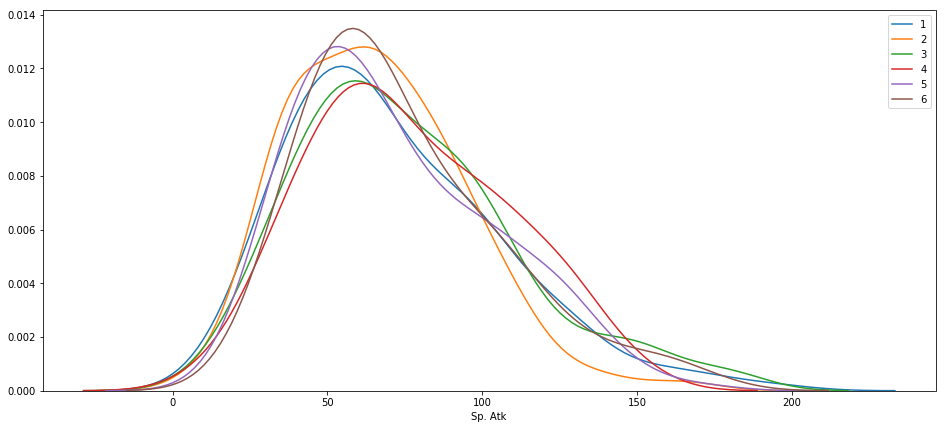

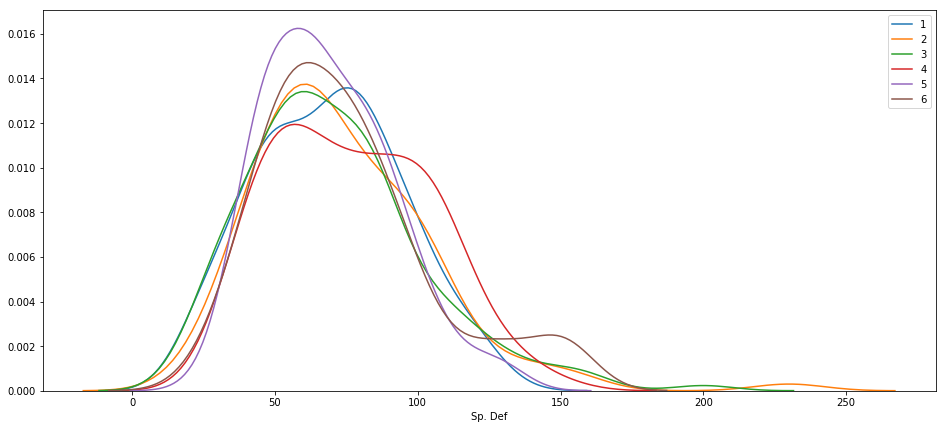

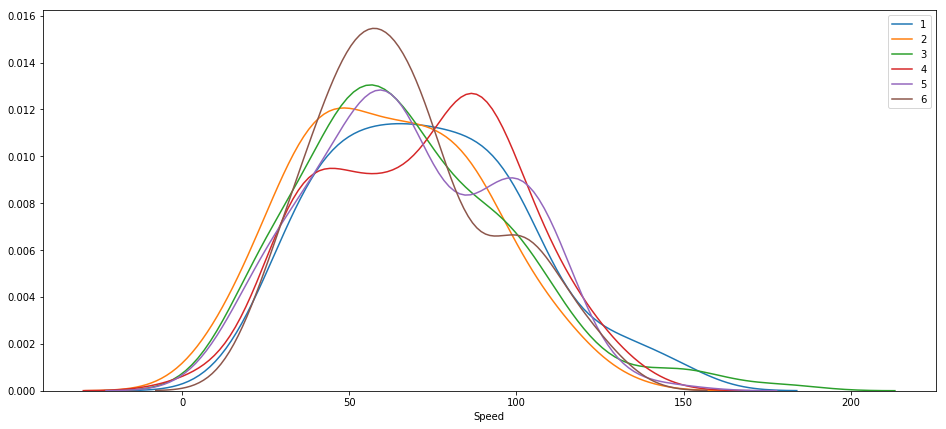

In [259]:
# Solution two: Across all generations, which ability points got changed in terms of all types of pokemon?
"HP"

def diff_generation(data, generation, ability, label):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,7)
    
    for g in generation:
        one_generation = data[data['Generation']==g]
        a = sns.distplot(one_generation[ability],axlabel= label, hist=False, kde=True, label=str(g))

# type
for a in ability:
    diff_generation(pokemon, generation, a, a)


### Explain:

1. For the ability HP and  Sp. Atk,  there are no big changes across different generations.
2. For the ability Attack,  the generations 5, 6 tend to lower the mean scores compared to the generations 2, 3, 4.
3. For the ability Defense,  the scores tend to be more normal distributed from the generation one to six, except for the generation 4, which seems to have two peaks for the scores of defense.
4. For the ability Sp. Def,  the designers tend to lower the scores across the generations from the one to six, except for the generation 4, which seems to have two peaks for the scores of Sp. Def.
5. For the ability Speed,  there is a big improvement in the generation four but it seems like that designers changed the scores back to normal in the generation five and six.

### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [ ]:
# put your code here

(Use this space to explain your answers)